In [2]:
import numpy as np

In [3]:
simple_words = ['cat', 'dog', 'bird', 'book', 'house', 'chair', 'table', 'pen', 
                    'paper', 'water', 'food', 'fish', 'hand', 'foot', 'ball', 'cup', 'phone',
                    'light', 'road', 'bag', 'clock', 'mouse', 'key', 'rain', 'wind', 'river', 'apple',
                    'grass', 'leaf', 'wall', 'window', 'box', 'flower', 'star', 'cake'][:10]
tasks = ["country_capital", "landmark_country", "present_past", "singular_plural", "capitalize_first_letter", "lowercase_first_letter"]

In [4]:
from transformers import AutoModelForCausalLM, AutoTokenizer

device = "cpu"
model_name_or_path = "openai-community/gpt2-xl"

tokenizer = AutoTokenizer.from_pretrained(model_name_or_path)
tokenizer.pad_token_id = tokenizer.eos_token_id
model = AutoModelForCausalLM.from_pretrained(model_name_or_path)

/proj/inductive-bias.shadow/abakalov.anaconda/envs/soft_prompts/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/proj/inductive-bias.shadow/abakalov.anaconda/envs/soft_prompts/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
# import pandas as pd
# import wandb

# api = wandb.Api()
# entity, project = "aleksandrabakalova", "soft-prompts-10"
# runs = api.runs(entity + "/" + project)

# summary_list, config_list, name_list, history_list = [], [], [], []
# for run in runs:
#     # .summary contains output keys/values for
#     # metrics such as accuracy.
#     #  We call ._json_dict to omit large files
#     summary_list.append(run.summary._json_dict)

#     history_list.append(run.history)

#     # .config contains the hyperparameters.
#     #  We remove special values that start with _.
#     config_list.append({k: v for k, v in run.config.items() if not k.startswith("_")})

#     # .name is the human-readable name of the run.
#     name_list.append(run.name)

# runs_df = pd.DataFrame(
#     {"summary": summary_list, "history": history_list, "config": config_list, "name": name_list}
# )

# names = set([runs_df.iloc[i]["name"] for i in range(len(runs_df))])
# runs = {
#     name: sorted([(-run[1]["summary"]["_timestamp"], run[1]) for run in runs_df.iterrows() if run[1]["name"] == name and "_timestamp" in run[1]["summary"]])
#     for name in names
# }
# names = set([name for name in names if len(runs[name]) > 0])
# runs = {
#     name: runs[name][0][1]
#     for name in names
# }
# runs_filtered = {}
# for name in names:
#     history = runs[name]["history"]()
#     try:
#         runs_filtered[name] = {
#             "epochs": history["epoch/epoch"].dropna().tolist(),
#             "eval_epoch_loss": history["epoch/eval_epoch_loss"].dropna().tolist(),
#             "eval_accuracy": history["epoch/eval_accuracy"].dropna().tolist()
#         }
#     except:
#         continue

wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=19 sec). Create a new API with an integer timeout larger than 19, e.g., `api = wandb.Api(timeout=29)` to increase the graphql timeout.


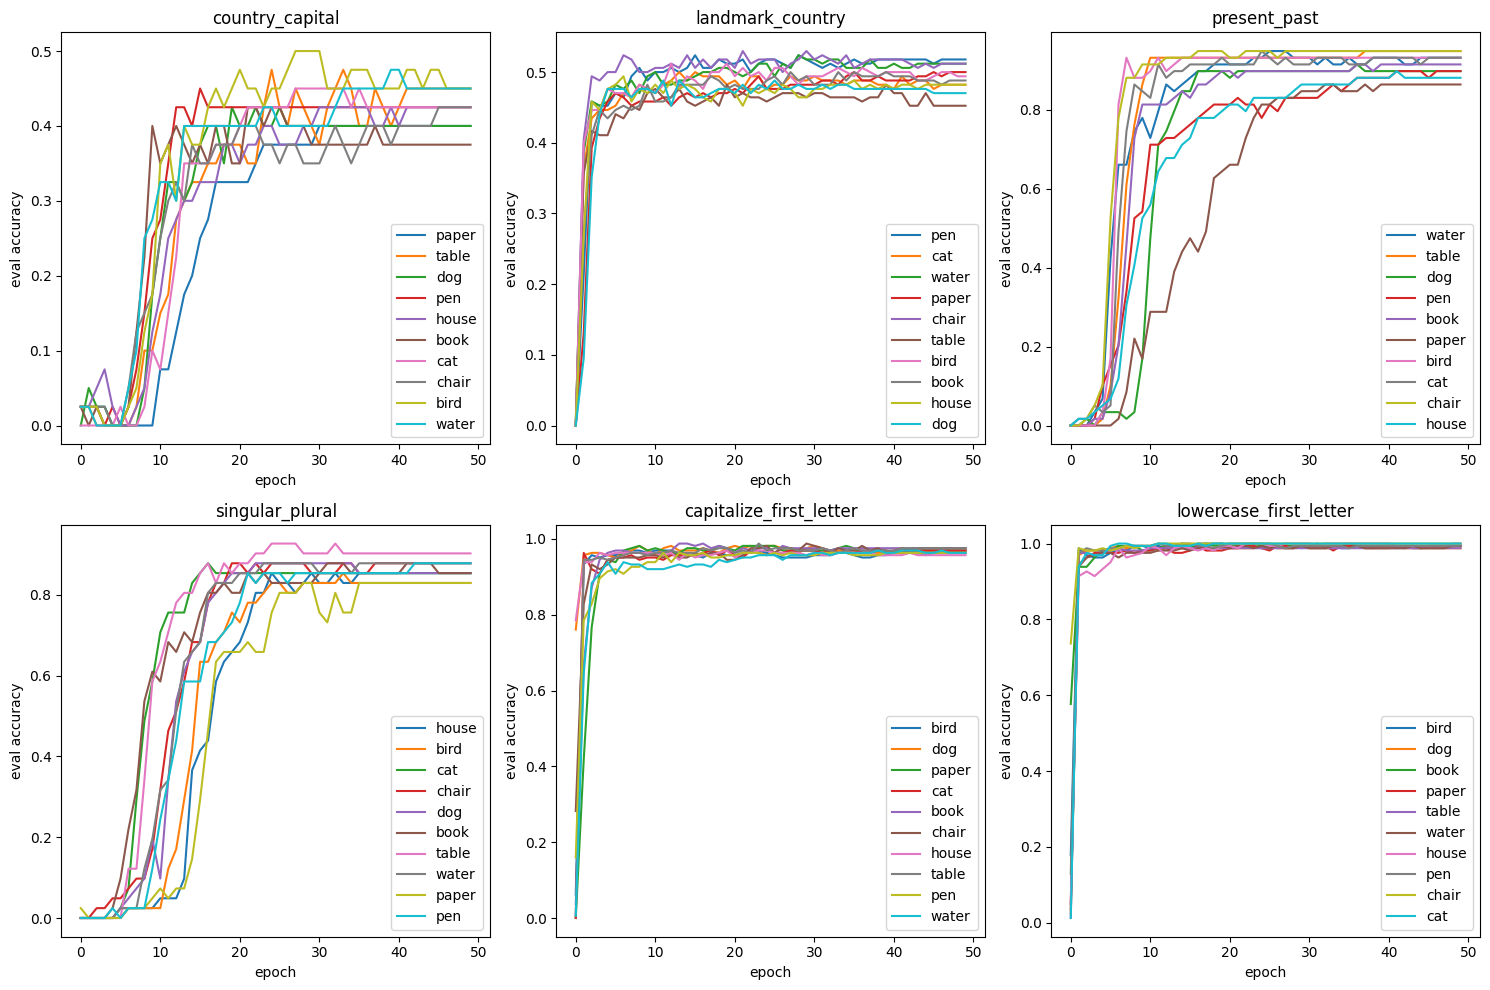

In [51]:
# import matplotlib.pyplot as plt
# num_epochs = 50

# rows = 2
# columns = 3
# fig, axs = plt.subplots(rows, columns)
# fig.set_size_inches(15, 10)
# for task_i, task in enumerate(tasks):
#     x = task_i // columns
#     y = task_i % columns
#     for run_name in runs_filtered:
#         if run_name.split("-")[0] == task:
#             axs[x][y].plot(runs_filtered[run_name]["epochs"], runs_filtered[run_name]["eval_accuracy"], label=run_name.split("-")[1])
#     axs[x][y].legend()
#     axs[x][y].set_title(task)
#     axs[x][y].set_ylabel("eval accuracy")
#     axs[x][y].set_xlabel("epoch")
# fig.tight_layout()
# plt.savefig("images/accuracy_by_task.png")

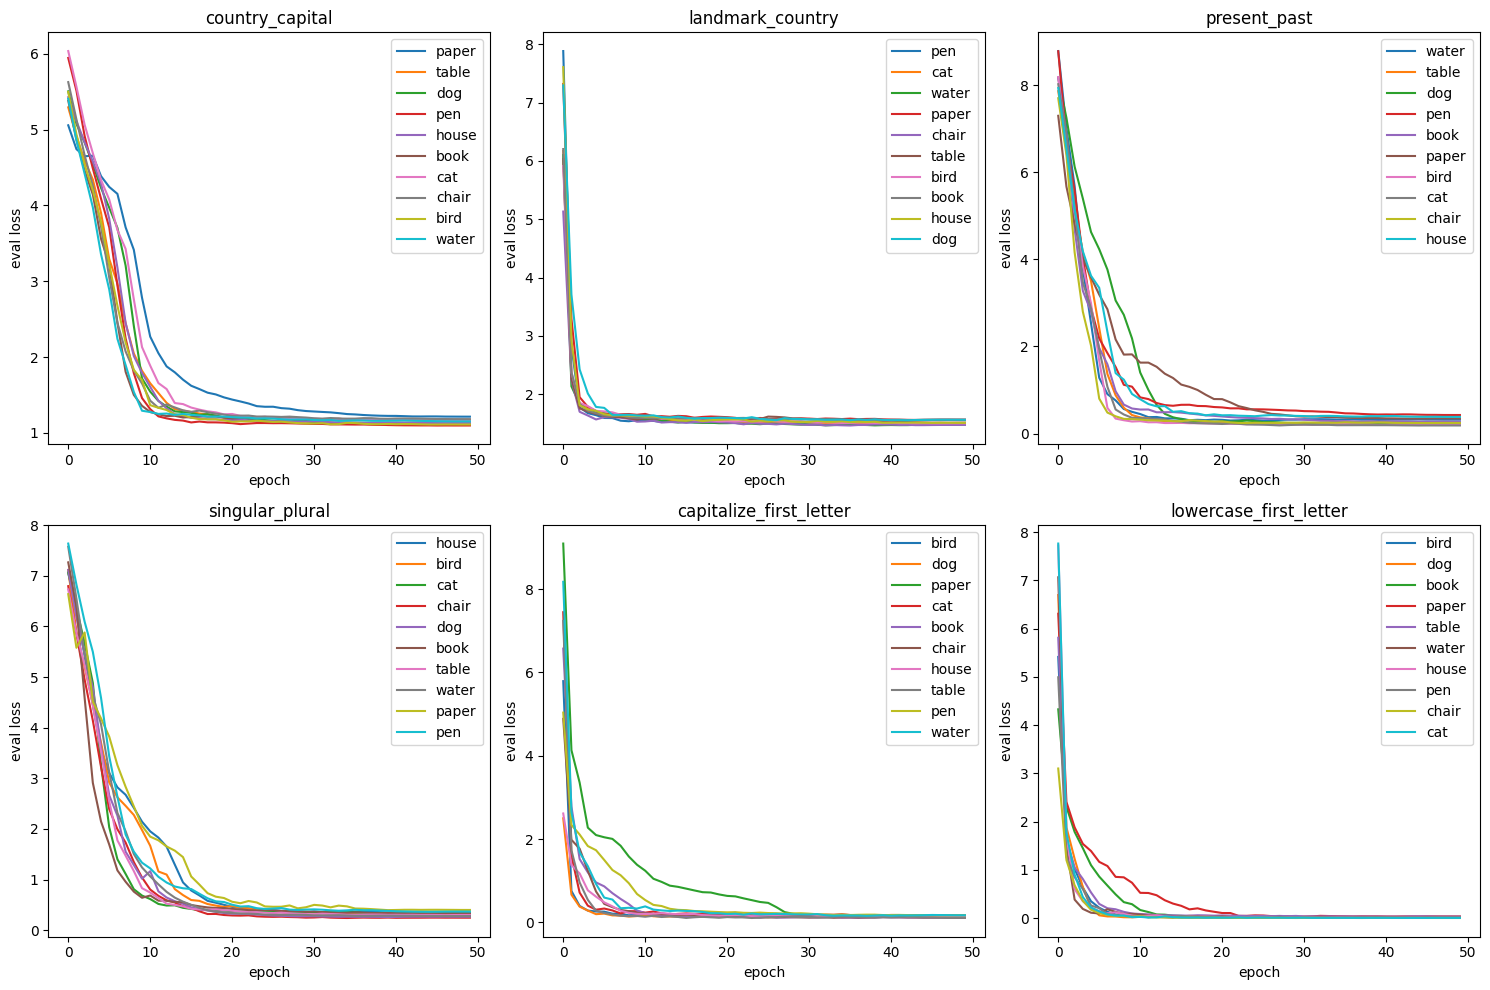

In [60]:
# import matplotlib.pyplot as plt
# num_epochs = 50

# rows = 2
# columns = 3
# fig, axs = plt.subplots(rows, columns)
# fig.set_size_inches(15, 10)
# for task_i, task in enumerate(tasks):
#     x = task_i // columns
#     y = task_i % columns
#     for run_name in runs_filtered:
#         if run_name.split("-")[0] == task:
#             axs[x][y].plot(runs_filtered[run_name]["epochs"], runs_filtered[run_name]["eval_epoch_loss"], label=run_name.split("-")[1])
#     axs[x][y].legend()
#     axs[x][y].set_title(task)
#     axs[x][y].set_ylabel("eval loss")
#     axs[x][y].set_xlabel("epoch")
# fig.tight_layout()
# plt.savefig("images/loss_by_task.png")

In [6]:
import numpy as np
embeddings = {}
for word in simple_words:
    for task in tasks:
        embeddings[(word, task)] = np.load(f"../embeddings/{task}-{word}.npy")

In [48]:
import matplotlib.pyplot as plt
from matplotlib import colormaps

X = []
for word in simple_words:
    for task in tasks:
        for token in range(4):
            X.append(embeddings[(word, task)][-1, token, :])
sample = np.random.choice(np.arange(model.transformer.wte.weight.shape[0]), size=100, replace=False)
for item in sample:
    X.append(model.transformer.wte.weight[item].detach().numpy())
X = np.stack(X)

from sklearn.manifold import TSNE
X_tsne = TSNE(n_components=2, metric="cosine").fit_transform(X)

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(15, 6)
labels = []
for word in simple_words:
    for task in tasks:
        for token in range(4):
            labels.append(word)
for i in range(100):
    labels.append("vocab")
inds_for_task = {}
for word in simple_words:
    inds_for_task[word] = [i for i, label in enumerate(labels) if label == word]
inds_for_task["vocab"] = [i for i, label in enumerate(labels) if label == "vocab"]

for i, (label, inds) in enumerate(inds_for_task.items()):
    axs[0].scatter(X_tsne[inds, 0], X_tsne[inds, 1], label=label, color=colormaps["tab20"](i))
axs[0].legend()

labels = []
for word in simple_words:
    for task in tasks:
        for token in range(4):
            labels.append(task)
for i in range(100):
    labels.append("vocab")
inds_for_task = {}
for task in tasks:
    inds_for_task[task] = [i for i, label in enumerate(labels) if label == task]
inds_for_task["vocab"] = [i for i, label in enumerate(labels) if label == "vocab"]

for i, (label, inds) in enumerate(inds_for_task.items()):
    axs[1].scatter(X_tsne[inds, 0], X_tsne[inds, 1], label=label, color=colormaps["tab20"](i))
axs[1].legend()
plt.savefig("images/tsne_plot.png")
plt.close()

In [104]:
import matplotlib.pyplot as plt
from matplotlib import colormaps

X = []
for word in simple_words:
    for task in tasks:
        for token in range(4):
            X.append(embeddings[(word, task)][-1, token, :])
X = np.stack(X)

from sklearn.manifold import TSNE
X_tsne = TSNE(n_components=2, metric="cosine").fit_transform(X)

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(15, 6)
labels = []
for word in simple_words:
    for task in tasks:
        for token in range(4):
            labels.append(word)
inds_for_task = {}
for word in simple_words:
    inds_for_task[word] = [i for i, label in enumerate(labels) if label == word]

for i, (label, inds) in enumerate(inds_for_task.items()):
    axs[0].scatter(X_tsne[inds, 0], X_tsne[inds, 1], label=label, color=colormaps["tab20"](i))
axs[0].legend()

labels = []
for word in simple_words:
    for task in tasks:
        for token in range(4):
            labels.append(task)
inds_for_task = {}
for task in tasks:
    inds_for_task[task] = [i for i, label in enumerate(labels) if label == task]

for i, (label, inds) in enumerate(inds_for_task.items()):
    axs[1].scatter(X_tsne[inds, 0], X_tsne[inds, 1], label=label, color=colormaps["tab20"](i))
axs[1].legend()
plt.savefig("../images/tsne_plot.png")
plt.close()

In [24]:
average_dist_between_tokens = {(task, word): 0 for task in tasks for word in simple_words}
epoch = 49
for task in tasks:
    for word in simple_words:
        for token in range(4):
            for other_token in range(4):
                average_dist_between_tokens[(task, word)] += np.sqrt(((embeddings[(word, task)][epoch, token] - embeddings[(word, task)][epoch, other_token]) ** 2).sum())
        average_dist_between_tokens[(task, word)] /= 4 * 4

sample = np.random.choice(np.arange(model.transformer.wte.weight.shape[0]), size=100, replace=False)
average_dist_between_words_in_vocab = 0
for item in sample:
    for other_item in sample:
        average_dist_between_words_in_vocab += np.sqrt(((model.transformer.wte.weight[item].detach().numpy() - model.transformer.wte.weight[other_item].detach().numpy()) ** 2).sum())
average_dist_between_words_in_vocab /= len(sample) * (len(sample))
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3)
fig.set_size_inches(30, 8)
for task_i, task in enumerate(tasks):
    average_dist_between_tokens_for_task = {item[0][1]: item[1] for item in average_dist_between_tokens.items() if item[0][0] == task}
    axs[0].bar(task_i * len(simple_words) + np.arange(len(average_dist_between_tokens_for_task)),
            average_dist_between_tokens_for_task.values(), label=task)
axs[0].set_xticks(np.arange(len(average_dist_between_tokens)), [word for _ in tasks for word in simple_words], rotation=90)
axs[0].axhline(average_dist_between_words_in_vocab, linestyle="--", label="average dist betwen tokens in vocab")
axs[0].set_xlabel("Initialization word")
axs[0].set_ylabel("Average l2 distance between prompt embeddings for different tokens")
axs[0].legend()

average_dist_between_tasks = {(word, token): 0 for token in range(4) for word in simple_words}
epoch = 49
for token in range(4):
    for word in simple_words:
        for task in tasks:
            for other_task in tasks:
                average_dist_between_tasks[(word, token)] += np.sqrt(((embeddings[(word, task)][epoch, token] - embeddings[(word, other_task)][epoch, token]) ** 2).sum())
        average_dist_between_tasks[(word, token)] /= len(tasks) * (len(tasks))

for token in range(4):
    average_dist_between_tasks_for_token = {item[0][0]: item[1] for item in average_dist_between_tasks.items() if item[0][1] == token}
    axs[1].bar(token * len(simple_words) + np.arange(len(average_dist_between_tasks_for_token)),
            average_dist_between_tasks_for_token.values(), label=f"Token {token}")
axs[1].set_xticks(np.arange(len(average_dist_between_tasks)), [word for _ in range(4) for word in simple_words], rotation=90)
axs[1].axhline(average_dist_between_words_in_vocab, linestyle="--", label="average dist betwen tokens in vocab")
axs[1].set_xlabel("Initialization word")
axs[1].set_ylabel("Average l2 distance between prompt embeddings for different tasks")
axs[1].legend()

average_dist_between_words = {(task, token): 0 for token in range(4) for task in tasks}
epoch = 49
for token in range(4):
    for task in tasks:
        for word in simple_words:
            for other_word in simple_words:
                average_dist_between_words[(task, token)] += np.sqrt(((embeddings[(word, task)][epoch, token] - embeddings[(other_word, task)][epoch, token]) ** 2).sum())
        average_dist_between_words[(task, token)] /= len(simple_words) * (len(simple_words))

for token in range(4):
    average_dist_between_words_for_token = {item[0][0]: item[1] for item in average_dist_between_words.items() if item[0][1] == token}
    axs[2].bar(token * len(tasks) + np.arange(len(average_dist_between_words_for_token)),
            average_dist_between_words_for_token.values(), label=f"Token {token}")
axs[2].set_xticks(np.arange(len(average_dist_between_words)), [task for _ in range(4) for task in tasks], rotation=90)
axs[2].axhline(average_dist_between_words_in_vocab, linestyle="--", label="average dist betwen tokens in vocab")
axs[2].set_xlabel("Task")
axs[2].set_ylabel("Average l2 distance between prompt embeddings for different init words")
axs[2].legend()

for i in range(3):
    axs[i].set_ylim([1.5, 3.5])
fig.tight_layout()
plt.savefig("images/average_l2_dist_barplot.png")
plt.close()

In [23]:
average_dist_between_tokens = {(task, word): 0 for task in tasks for word in simple_words}
epoch = 49
for task in tasks:
    for word in simple_words:
        for token in range(4):
            for other_token in range(4):
                average_dist_between_tokens[(task, word)] += 1 - np.dot(embeddings[(word, task)][epoch, token], embeddings[(word, task)][epoch, other_token]) / (np.linalg.norm(embeddings[(word, task)][epoch, token]) * np.linalg.norm(embeddings[(word, task)][epoch, other_token]))
        average_dist_between_tokens[(task, word)] /= 4 * 4

sample = np.random.choice(np.arange(model.transformer.wte.weight.shape[0]), size=100, replace=False)
average_dist_between_words_in_vocab = 0
for item in sample:
    for other_item in sample:
        average_dist_between_words_in_vocab += 1 - np.dot(model.transformer.wte.weight[item].detach().numpy(), model.transformer.wte.weight[other_item].detach().numpy()) / (np.linalg.norm(model.transformer.wte.weight[item].detach().numpy()) * np.linalg.norm(model.transformer.wte.weight[other_item].detach().numpy()))
average_dist_between_words_in_vocab /= len(sample) * (len(sample))
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3)
fig.set_size_inches(30, 8)
for task_i, task in enumerate(tasks):
    average_dist_between_tokens_for_task = {item[0][1]: item[1] for item in average_dist_between_tokens.items() if item[0][0] == task}
    axs[0].bar(task_i * len(simple_words) + np.arange(len(average_dist_between_tokens_for_task)),
            average_dist_between_tokens_for_task.values(), label=task)
axs[0].set_xticks(np.arange(len(average_dist_between_tokens)), [word for _ in tasks for word in simple_words], rotation=90)
axs[0].axhline(average_dist_between_words_in_vocab, linestyle="--", label="average dist betwen tokens in vocab")
axs[0].set_xlabel("Initialization word")
axs[0].set_ylabel("Average cosine distance between prompt embeddings for different tokens")
axs[0].legend()

average_dist_between_tasks = {(word, token): 0 for token in range(4) for word in simple_words}
epoch = 49
for token in range(4):
    for word in simple_words:
        for task in tasks:
            for other_task in tasks:
                average_dist_between_tasks[(word, token)] += 1 - np.dot(embeddings[(word, task)][epoch, token], embeddings[(word, other_task)][epoch, token]) / (np.linalg.norm(embeddings[(word, task)][epoch, token]) * np.linalg.norm(embeddings[(word, other_task)][epoch, token]))
        average_dist_between_tasks[(word, token)] /= len(tasks) * (len(tasks))

for token in range(4):
    average_dist_between_tasks_for_token = {item[0][0]: item[1] for item in average_dist_between_tasks.items() if item[0][1] == token}
    axs[1].bar(token * len(simple_words) + np.arange(len(average_dist_between_tasks_for_token)),
            average_dist_between_tasks_for_token.values(), label=f"Token {token}")
axs[1].set_xticks(np.arange(len(average_dist_between_tasks)), [word for _ in range(4) for word in simple_words], rotation=90)
axs[1].axhline(average_dist_between_words_in_vocab, linestyle="--", label="average dist betwen tokens in vocab")
axs[1].set_xlabel("Initialization word")
axs[1].set_ylabel("Average cosine distance between prompt embeddings for different tasks")
axs[1].legend()

average_dist_between_words = {(task, token): 0 for token in range(4) for task in tasks}
epoch = 49
for token in range(4):
    for task in tasks:
        for word in simple_words:
            for other_word in simple_words:
                average_dist_between_words[(task, token)] += 1 - np.dot(embeddings[(word, task)][epoch, token], embeddings[(other_word, task)][epoch, token]) / (np.linalg.norm(embeddings[(word, task)][epoch, token]) * np.linalg.norm(embeddings[(other_word, task)][epoch, token]))
        average_dist_between_words[(task, token)] /= len(simple_words) * (len(simple_words))

for token in range(4):
    average_dist_between_words_for_token = {item[0][0]: item[1] for item in average_dist_between_words.items() if item[0][1] == token}
    axs[2].bar(token * len(tasks) + np.arange(len(average_dist_between_words_for_token)),
            average_dist_between_words_for_token.values(), label=f"Token {token}")
axs[2].set_xticks(np.arange(len(average_dist_between_words)), [task for _ in range(4) for task in tasks], rotation=90)
axs[2].axhline(average_dist_between_words_in_vocab, linestyle="--", label="average dist betwen tokens in vocab")
axs[2].set_xlabel("Task")
axs[2].set_ylabel("Average cosine distance between prompt embeddings for different init words")
axs[2].legend()

for i in range(3):
    axs[i].set_ylim([0, 1])

fig.tight_layout()
plt.savefig("images/average_cosine_dist_barplot.png")
plt.close()


In [101]:
import pandas as pd
average_dist_between_tasks = {word: 0 for word in simple_words}
epoch = 49
for word in simple_words:
    for task in tasks:
        for other_task in tasks:
            for token in range(4):
                for other_token in range(4):
                    average_dist_between_tasks[word] += 1 - (np.dot(embeddings[(word, task)][epoch, token], embeddings[(word, other_task)][epoch, other_token]) /
                                                                (np.linalg.norm(embeddings[(word, task)][epoch, token]) * np.linalg.norm(embeddings[(word, other_task)][epoch, other_token])))
    average_dist_between_tasks[word] /= 4 * 4
    average_dist_between_tasks[word] /= len(tasks) * len(tasks)

average_dist_between_tasks_df = pd.DataFrame.from_dict(average_dist_between_tasks, orient="index")
print(average_dist_between_tasks_df.to_latex())

\begin{tabular}{lr}
\toprule
 & 0 \\
\midrule
cat & 0.546034 \\
dog & 0.547264 \\
bird & 0.528472 \\
book & 0.567885 \\
house & 0.612360 \\
chair & 0.544497 \\
table & 0.580160 \\
pen & 0.566388 \\
paper & 0.506061 \\
water & 0.584952 \\
\bottomrule
\end{tabular}



In [102]:
average_dist_between_words = {task: 0 for task in tasks}
epoch = 49
for task in tasks:
    for word in simple_words:
        for other_word in simple_words:
            for token in range(4):
                for other_token in range(4):
                    average_dist_between_words[task] += 1 - (np.dot(embeddings[(word, task)][epoch, token], embeddings[(other_word, task)][epoch, other_token]) /
                                                                ((np.linalg.norm(embeddings[(word, task)][epoch, token]) * np.linalg.norm(embeddings[(other_word, task)][epoch, other_token]))))
    average_dist_between_words[task] /= 4 * 4
    average_dist_between_words[task] /= len(simple_words) * len(simple_words)
average_dist_between_words_df = pd.DataFrame.from_dict(average_dist_between_words, orient="index")
print(average_dist_between_words_df.to_latex())

\begin{tabular}{lr}
\toprule
 & 0 \\
\midrule
country_capital & 0.643099 \\
landmark_country & 0.665577 \\
present_past & 0.710362 \\
singular_plural & 0.684544 \\
capitalize_first_letter & 0.712954 \\
lowercase_first_letter & 0.710524 \\
\bottomrule
\end{tabular}



In [112]:
from scipy.stats import pearsonr
seqs = []
epoch = 49
token = 2
for word in simple_words:
    seq = []
    for task in tasks:
        for other_task in tasks:
            for token in range(4):
                for other_token in range(4):
                    dir1 = embeddings[(word, task)][epoch, token, :]
                    dir2 = embeddings[(word, other_task)][epoch, other_token, :]
                    dist = 1 - np.dot(dir1, dir2) / (np.linalg.norm(dir1) * np.linalg.norm(dir2))
                    seq.append(dist)
    seqs.append(seq)

pvalues = []
statistics = []
for word_i in range(len(seqs)):
    for other_word_i in range(len(seqs)):
        corr = pearsonr(seqs[word_i], seqs[other_word_i])
        statistics.append(corr.statistic)
        pvalues.append(corr.pvalue)
np.max(pvalues), np.min(statistics)

(4.376245502748018e-102, 0.7427891819212038)

In [55]:
average_dist_between_everything = 0
epoch = 49
for task in tasks:
    for other_task in tasks:
        for word in simple_words:
            for other_word in simple_words:
                for token in range(4):
                    for other_token in range(4):
                        average_dist_between_everything += 1 - (np.dot(embeddings[(word, task)][epoch, token], embeddings[(other_word, other_task)][epoch, other_token]) /
                                                                ((np.linalg.norm(embeddings[(word, task)][epoch, token]) * np.linalg.norm(embeddings[(other_word, other_task)][epoch, other_token]))))
average_dist_between_everything /= 4 * 4
average_dist_between_everything /= len(simple_words) * len(simple_words)
average_dist_between_everything /= len(tasks) * len(tasks)
average_dist_between_everything

0.7415353843428633

In [170]:
top_k_closest  = {
    (task, word, token): [] for task in tasks for word in simple_words for token in range(4)
}
epoch = 49
labels, embeddings_for_preimage = [], []
sample = np.arange(model.transformer.wte.weight.shape[0]) # np.random.choice(np.arange(model.transformer.wte.weight.shape[0]), size=500, replace=False)
for item in sample:
    labels.append(f"vocab_{tokenizer.convert_ids_to_tokens([item])[0]}")
    embeddings_for_preimage.append(model.transformer.wte.weight[item].detach().numpy())
for word in simple_words:
    labels.append(f"init_word_{word}")
    embeddings_for_preimage.append(model.transformer.wte.weight[tokenizer.convert_tokens_to_ids([word])[0]].detach().numpy())
for word in simple_words:
    for task in tasks:
        for token in range(4):
            labels.append((task, word, token))
            embeddings_for_preimage.append(embeddings[(word, task)][epoch, token])

for task in tasks:
    for word in simple_words:
        for token in range(4):
            emb = embeddings[(word, task)][epoch, token]
            dists = np.zeros(len(embeddings_for_preimage))
            for i, other_emb in enumerate(embeddings_for_preimage):
                dists[i] = 1 - (np.dot(emb, other_emb) / ((np.linalg.norm(emb) * np.linalg.norm(other_emb))))
            # closest = np.argpartition(dists, k)[:k]
            closest = np.arange(len(dists))[dists < 0.7]
            top_k_closest[(task, word, token)] = [(labels[ind], dists[ind]) for ind in closest]

small_sample = np.random.choice(np.arange(model.transformer.wte.weight.shape[0]), size=100, replace=False)
top_k_closest_to_words = {
    token: [] for token in [tokenizer.convert_ids_to_tokens([item])[0] for item in small_sample] + simple_words
}
for token in top_k_closest_to_words:
    emb = model.transformer.wte.weight[tokenizer.convert_tokens_to_ids([token])[0]].detach().numpy()
    dists = np.zeros(len(embeddings_for_preimage))
    for i, other_emb in enumerate(embeddings_for_preimage):
        dists[i] = 1 - (np.dot(emb, other_emb) / ((np.linalg.norm(emb) * np.linalg.norm(other_emb))))
    closest = np.arange(len(dists))[dists < 0.7]
    top_k_closest_to_words[token] = [(labels[ind], dists[ind]) for ind in closest]

In [184]:
top_k_closest_to_words["paper"]

[('vocab_Ġpaper', 0.4031375050544739),
 ('vocab_Ġpapers', 0.6022612750530243),
 ('vocab_ĠPaper', 0.42218995094299316),
 ('vocab_paper', -1.1920928955078125e-07),
 ('vocab_sheet', 0.6879678070545197),
 ('vocab_ĠPapers', 0.6304580867290497),
 ('vocab_Ġparchment', 0.6942903697490692),
 ('vocab_papers', 0.3734550476074219),
 ('vocab_Paper', 0.34847867488861084),
 ('init_word_paper', -1.1920928955078125e-07),
 (('country_capital', 'paper', 0), 0.10728955268859863),
 (('country_capital', 'paper', 1), 0.056633830070495605),
 (('country_capital', 'paper', 2), 0.08634716272354126),
 (('country_capital', 'paper', 3), 0.6533591449260712),
 (('landmark_country', 'paper', 0), 0.47956013679504395),
 (('landmark_country', 'paper', 1), 0.35993313789367676),
 (('landmark_country', 'paper', 2), 0.5798568725585938),
 (('present_past', 'paper', 0), 0.4386928081512451),
 (('present_past', 'paper', 1), 0.36161279678344727),
 (('present_past', 'paper', 2), 0.5613645911216736),
 (('present_past', 'paper', 3),

In [180]:
neighbourhood = [item[0][len("vocab_"):] for item in top_k_closest_to_words["Ġinterviewer"]]
print(", ".join(["_" + t[1:] if t.startswith("Ġ") else t for t in neighbourhood]))

_interview, _reporters, _reporter, _interviews, _journalist, _interviewed, _analyst, _interrog, _Interview, _investigator, _columnist, _psychologist, _caller, _filmmaker, _questionnaire, _commentator, _psychiatrist, _interviewing, _moderator, _narrator, _informant, _examiner, _reviewer, _presenter, _interviewer, Interview, _commenter, _announcer


In [185]:
p = []
for task in tasks:
    for word in simple_words:
        for token in range(4):
            p.append(len(top_k_closest[(task, word, token)]) / (len(tasks) * len(simple_words) * 4))
np.mean(p)

0.36039930555555555

In [199]:
p = []
for task in tasks:
    for word in simple_words:
        for token in range(4):
            p.append(len([item for item in top_k_closest[(task, word, token)] if "vocab" in item[0]]))
np.mean(p), np.max(p)

(14.7875, 109)

In [203]:
p = []
for task in tasks:
    for word in simple_words:
        for token in range(4):
            p.append(len([item for item in top_k_closest[(task, word, token)] if "vocab" in item[0]]))
            if p[-1] == 109:
                print(task, word, token)
                print(top_k_closest[(task, word, token)])
np.mean(p), np.max(p)

lowercase_first_letter water 1
[('vocab_À', 0.6670391261577606), ('vocab_Á', 0.6653298735618591), ('vocab_Ý', 0.625635176897049), ('vocab_Þ', 0.6225608587265015), ('vocab_ß', 0.6432019174098969), ('vocab_ñ', 0.6249761581420898), ('vocab_ò', 0.6284289360046387), ('vocab_ô', 0.6272411942481995), ('vocab_õ', 0.6653375327587128), ('vocab_ö', 0.6635604202747345), ('vocab_÷', 0.6642339825630188), ('vocab_ø', 0.6668002009391785), ('vocab_ù', 0.663849264383316), ('vocab_ú', 0.6666770577430725), ('vocab_û', 0.6663976907730103), ('vocab_ü', 0.6670747101306915), ('vocab_ý', 0.665991872549057), ('vocab_þ', 0.6667184829711914), ('vocab_ÿ', 0.6652808487415314), ('vocab_Ā', 0.6656789481639862), ('vocab_ā', 0.6670537889003754), ('vocab_Ă', 0.6665431261062622), ('vocab_ă', 0.6667346954345703), ('vocab_Ą', 0.6658413708209991), ('vocab_ą', 0.6642187535762787), ('vocab_Ć', 0.6662512123584747), ('vocab_ć', 0.6643902361392975), ('vocab_Ĉ', 0.6647645235061646), ('vocab_ĉ', 0.6657659709453583), ('vocab_ċ', 0.

(14.7875, 109)

In [197]:
p = []
for task in tasks:
    for word in simple_words:
        for token in range(4):
            p.append(len([item for item in top_k_closest[(task, word, token)] if item[0][1] == word]))
np.mean(p)

20.7

In [187]:
p = []
for task in tasks:
    for word in simple_words:
        for token in range(4):
            p.append(len([item for item in top_k_closest[(task, word, token)] if item[0][1] == word]) / (len(top_k_closest[(task, word, token)])))
np.mean(p)

0.32546814514481637

In [191]:
p = []
for task in tasks:
    for word in simple_words:
        for token in range(4):
            p.append(len([item for item in top_k_closest[(task, word, token)]if item[0][0] == task]) / len(top_k_closest[(task, word, token)]))
np.mean(p)

0.23525251892285137

In [193]:
p = []
for task in tasks:
    for word in simple_words:
        for token in range(4):
            p.append(len([item for item in top_k_closest[(task, word, token)]if item[0][2] == token]) / len(top_k_closest[(task, word, token)]))
np.mean(p)

0.39787272064335494

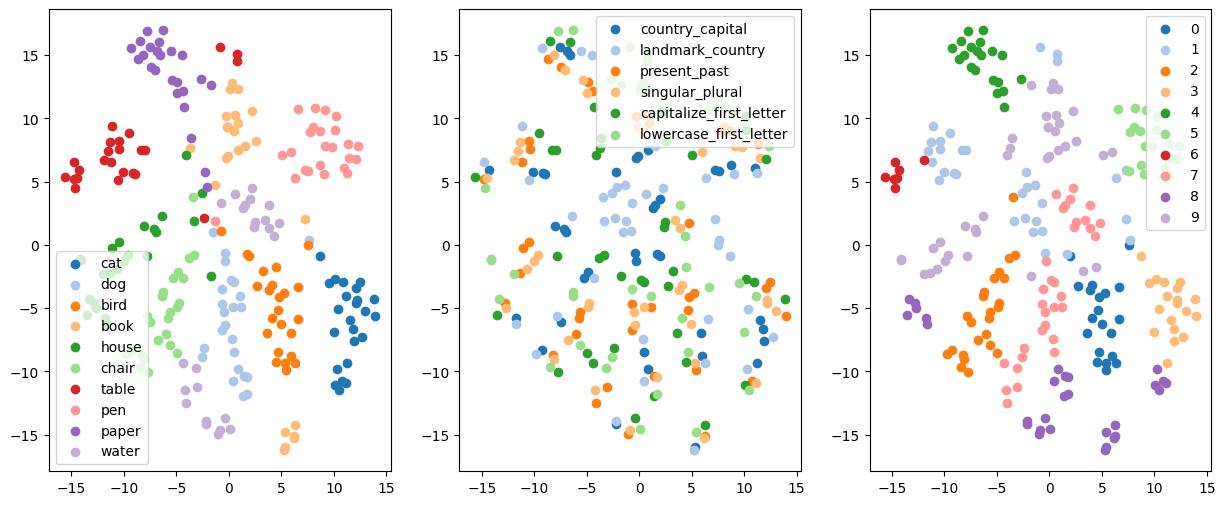

In [166]:
from sklearn.cluster import DBSCAN, KMeans
import matplotlib.pyplot as plt
from matplotlib import colormaps

# X = []
# for word in simple_words:
#     for task in tasks:
#         for token in range(4):
#             X.append(embeddings[(word, task)][-1, token, :])
# X = np.stack(X)

# from sklearn.manifold import TSNE
# X_tsne = TSNE(n_components=2, metric="cosine").fit_transform(X)

# clustering = DBSCAN(eps=0.4, min_samples=5, metric="cosine").fit(X)
n_clusters = 10
clustering = KMeans(n_clusters=n_clusters).fit(X)
dbscan_labels = clustering.labels_

fig, axs = plt.subplots(1, 3)
fig.set_size_inches(15, 6)

labels = []
for word in simple_words:
    for task in tasks:
        for token in range(4):
            labels.append(word)
inds_for_task = {}
for word in simple_words:
    inds_for_task[word] = [i for i, label in enumerate(labels) if label == word]
for i, (label, inds) in enumerate(inds_for_task.items()):
    axs[0].scatter(X_tsne[inds, 0], X_tsne[inds, 1], label=label, color=colormaps["tab20"](i))
axs[0].legend()

acc = 0
for 

labels = []
for word in simple_words:
    for task in tasks:
        for token in range(4):
            labels.append(task)
inds_for_task = {}
for task in tasks:
    inds_for_task[task] = [i for i, label in enumerate(labels) if label == task]
for i, (label, inds) in enumerate(inds_for_task.items()):
    axs[1].scatter(X_tsne[inds, 0], X_tsne[inds, 1], label=label, color=colormaps["tab20"](i))
axs[1].legend()

inds_for_task = {}
for dbscan_label in set(dbscan_labels):
    inds_for_task[dbscan_label] = [i for i, label in enumerate(dbscan_labels) if label == dbscan_label]
for i, (label, inds) in enumerate(inds_for_task.items()):
    axs[2].scatter(X_tsne[inds, 0], X_tsne[inds, 1], label=label, color=colormaps["tab20"](i))
axs[2].legend()
plt.show()